In [55]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import json

In [35]:
results = pd.read_csv("model_log.txt")
results.dtypes
#results["layer_sizes"] = results["layer_sizes"].apply(json.loads)
#results["dropout_rates"] = results["dropout_rates"].apply(json.loads)
#results.head(3)

name                         object
train_acc                   float64
test_acc                    float64
layer_sizes                  object
dropout_rates                object
use_batch_norm                 bool
train_seconds_per_sample    float64
dtype: object

In [36]:
aggregated = results.groupby(["name", "layer_sizes", "dropout_rates", "use_batch_norm"])
aggregated.mean().sort_values("test_acc", ascending=False)

train_acc  \
name      layer_sizes              dropout_rates                        use_batch_norm              
MLPModel  [256, 128, 64, 32]       [None, None, None, None]             True             0.931450   
CNNModel  [16, 32, 64, 128]        [None, None, None, None]             True             0.928368   
MLPModel  [32, 64, 128, 256]       [None, None, None, None]             True             0.922088   
CNNModel  [16, 32, 64, 128]        [None, None, None, None]             False            0.945340   
          [16, 16, 16, 128]        [None, None, None, None]             True             0.904366   
LSTMModel [128]                    [None]                               False            0.850754   
                                   [0.5]                                False            0.775894   
MLPModel  [512]                    [None]                               True             0.891920   
CNNModel  [16, 16, 16, 128]        [None, None, None, None]             False            0.906686   
MLPModel  [32, 32, 32, 32, 32, 32] [None, None, None, None, None, None] True             0.888572   
          [512]                    [0.5]                                True             0.882214   
          [256, 128, 64, 32]       [0.5, 0.5, 0.5, 0.5]                 True             0.748146   
CNNModel  [16, 128]                [0.5, 0.5]                           True             0.799120   
                                   [None, None]                         True             0.882436   
LSTMModel [32, 32, 32, 32]         [0.5, 0.5, 0.5, 0.5]                 False            0.590616   
MLPModel  [32, 32, 32, 32, 32, 32] [None, None, None, None, None, None] False            0.744138   
CNNModel  [16, 32, 64, 128]        [0.5, 0.5, 0.5, 0.5]                 True             0.498764   
LSTMModel [32, 32, 32, 32]         [None, None, None, None]             False            0.558636   
MLPModel  [32, 64, 128, 256]       [0.5, 0.5, 0.5, 0.5]                 True             0.624618   
                                   [None, None, None, None]             False            0.605500   
CNNModel  [16, 16, 16, 128]        [0.5, 0.5, 0.5, 0.5]                 True             0.304412   
          [16, 128]                [0.5, 0.5]                           False            0.142454   
MLPModel  [512]                    [0.5]                                False            0.135658   
          [32, 32, 32, 32, 32, 32] [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]       True             0.255860   
          [256, 128, 64, 32]       [None, None, None, None]             False            0.089622   
          [512]                    [None]                               False            0.123700   
CNNModel  [16, 128]                [None, None]                         False            0.096468   
MLPModel  [256, 128, 64, 32]       [0.5, 0.5, 0.5, 0.5]                 False            0.122330   
CNNModel  [16, 32, 64, 128]        [0.5, 0.5, 0.5, 0.5]                 False            0.133382   
          [16, 16, 16, 128]        [0.5, 0.5, 0.5, 0.5]                 False            0.134628   
MLPModel  [32, 64, 128, 256]       [0.5, 0.5, 0.5, 0.5]                 False            0.159320   
          [32, 32, 32, 32, 32, 32] [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]       False            0.153452   

                                                                                        test_acc  \
name      layer_sizes              dropout_rates                        use_batch_norm             
MLPModel  [256, 128, 64, 32]       [None, None, None, None]             True            0.771716   
CNNModel  [16, 32, 64, 128]        [None, None, None, None]             True            0.755554   
MLPModel  [32, 64, 128, 256]       [None, None, None, None]             True            0.741416   
CNNModel  [16, 32, 64, 128]        [None, None, None, None]             False           0.741412   
          [16, 16, 16, 128]        [None, None, None,

In [48]:
max_acc = results.groupby(["name"])[["train_acc", "test_acc"]].max()
max_acc

,train_acc,test_acc
name,,
CNNModel,0.96846,0.81818
LSTMModel,0.86799,0.78788
MLPModel,0.94499,0.82828


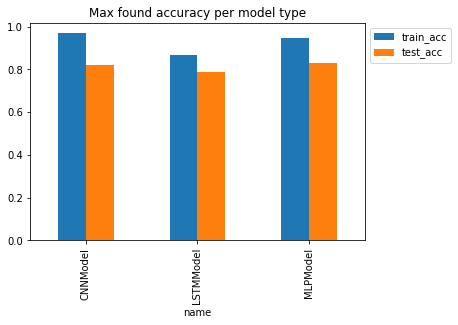

In [65]:
max_acc.plot.bar(title="Max found accuracy per model type").legend(bbox_to_anchor=(1,1));

In [68]:
mean_time = results.groupby(["name"])[["train_seconds_per_sample"]].mean()
mean_time

,train_seconds_per_sample
name,
CNNModel,0.000534
LSTMModel,0.021771
MLPModel,0.000572


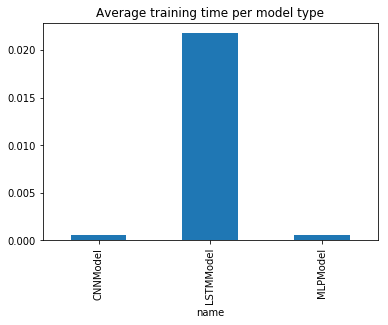

In [79]:
mean_time.plot.bar(title="Average training time per model type", legend=False);